# 2nd Level Topic Modeling

- After applying the Topic modeling in news dataset, we get the different topics.
- From the different topics, we choose the topic related to health.
- Our dataset for 2nd level topic modeling is the Result of topic occur in 1st level.
- We choose all the topic which is related to health and merged them to prepare a dataset.
- And then Again apply the topic modeling to sub group the topic into sub topic.

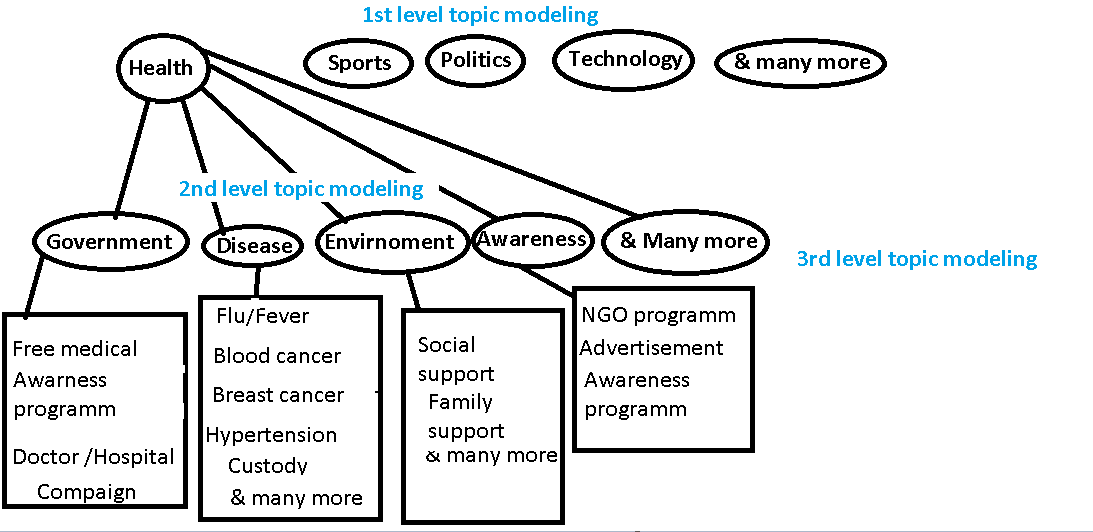

In [0]:
#importing dataset from Google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


### Importing the dataset

In [0]:
import pandas as pd
data=pd.read_csv('/content/gdrive/My Drive/mod_dataset/abcnews-date-text.csv',error_bad_lines=False)

In [1]:
data_text = data[['text']]
data_text['index'] = data_text.index
documents = data_text

In [0]:
print(len(documents))
print(documents[:5])

200
         text  index
0  australia       0
1       test       1
2       time       2
3       life       3
4      take        4


# Data preprocessing 
## Different process we do here like as Tokenization ,lemetization and stemming the data
- we wanted to convert the data to their normal form for example 'stolen' would converted to steal
### Here nltk is used for removing different language rather than english (Hindi and urdu like that word would be removed)
- In preprocessing actually we remove all the punctuation marks , exclamatory marks and commas 

In [0]:

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
               
            

/usr/local/lib/python3.6/dist-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# Lemmatization 
## Lemmatization is used for gouping of word that's contains the same meaning(synonyms,antonyms)
# Tokenization
## Tokenization is used for keeps the word having meaningfull meaning
- This is used for removal of word like if,the ,a,an that word doesn't make any sense in Topic
# Stemming
## Stemming is used for convert the word into their root form

In [0]:
def lemmatize_stemming(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

# preview data after preprocessing 
- How the data will look like 

In [0]:
# Select a document to preview after preprocessing
doc_sample = documents[documents['index'] ==10].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))



original document: 
['court', '', '']


 tokenized and lemmatized document: 
['court']


In [0]:
processed_docs = documents['text'].astype(str).map(preprocess)
processed_docs[:10]

0    [australia]
1         [test]
2         [time]
3         [life]
4             []
5         [lead]
6     [victoria]
7     [industry]
8         [mark]
9         [fail]
Name: text, dtype: object

### Dictionary is formed for 

In [0]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 australia
1 test
2 time
3 life
4 lead
5 victoria
6 industry
7 mark
8 fail
9 court
10 charge


In [0]:
#To limitised the word by its occurance, you can use the below line.
#dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [0]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[10]

[(9, 1)]

In [0]:
import pickle
pickle.dump(bow_corpus, open('bow_corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [0]:
bow_doc_4310 = bow_corpus[10]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 9 ("court") appears 1 time.


In [0]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 1.0)]


### Saving the Model for finding the correlation of topics

In [0]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
lda_model.save('model10.gensim')

In [0]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.036*"hospital" + 0.036*"president" + 0.036*"storm" + 0.036*"community" + 0.036*"royal" + 0.036*"festival" + 0.036*"budget" + 0.036*"rescue" + 0.036*"brisbane" + 0.036*"reveal"
Topic: 1 
Words: 0.030*"biotic" + 0.030*"anti" + 0.030*"state" + 0.030*"korea" + 0.030*"lose" + 0.030*"seek" + 0.030*"turbull" + 0.030*"trade" + 0.030*"statio" + 0.030*"team"
Topic: 2 
Words: 0.046*"australias" + 0.028*"doald" + 0.028*"drum" + 0.028*"race" + 0.028*"rise" + 0.028*"campaign" + 0.028*"woman" + 0.028*"police" + 0.028*"people" + 0.028*"hour"
Topic: 3 
Words: 0.028*"women" + 0.028*"mark" + 0.028*"court" + 0.028*"fail" + 0.028*"save" + 0.028*"driver" + 0.028*"support" + 0.028*"gold" + 0.028*"federal" + 0.028*"charge"
Topic: 4 
Words: 0.027*"train" + 0.027*"industry" + 0.027*"centre" + 0.027*"east" + 0.027*"beach" + 0.027*"hill" + 0.027*"market" + 0.027*"search" + 0.027*"sexual" + 0.027*"commissio"
Topic: 5 
Words: 0.025*"australia" + 0.025*"test" + 0.025*"urge" + 0.025*"star" + 0.025*

In [0]:
processed_docs[10]

['court']

In [0]:
unseen_document = 'cancer in women and other health issue'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 10)))

Score: 0.366668701171875	 Topic: 0.030*"biotic" + 0.030*"anti" + 0.030*"state" + 0.030*"korea" + 0.030*"lose" + 0.030*"seek" + 0.030*"turbull" + 0.030*"trade" + 0.030*"statio" + 0.030*"team"
Score: 0.3666646480560303	 Topic: 0.028*"women" + 0.028*"mark" + 0.028*"court" + 0.028*"fail" + 0.028*"save" + 0.028*"driver" + 0.028*"support" + 0.028*"gold" + 0.028*"federal" + 0.028*"charge"
Score: 0.03333333507180214	 Topic: 0.036*"hospital" + 0.036*"president" + 0.036*"storm" + 0.036*"community" + 0.036*"royal" + 0.036*"festival" + 0.036*"budget" + 0.036*"rescue" + 0.036*"brisbane" + 0.036*"reveal"
Score: 0.03333333507180214	 Topic: 0.046*"australias" + 0.028*"doald" + 0.028*"drum" + 0.028*"race" + 0.028*"rise" + 0.028*"campaign" + 0.028*"woman" + 0.028*"police" + 0.028*"people" + 0.028*"hour"
Score: 0.03333333507180214	 Topic: 0.027*"train" + 0.027*"industry" + 0.027*"centre" + 0.027*"east" + 0.027*"beach" + 0.027*"hill" + 0.027*"market" + 0.027*"search" + 0.027*"sexual" + 0.027*"commissio"
S

### We also increase the topic to see the syncronization of different topics and choose the best syncronized topics.

In [0]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('bow_corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model10.gensim')


## Draw the graph for finding the corelation between different topics

In [0]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

### Result something look like this.
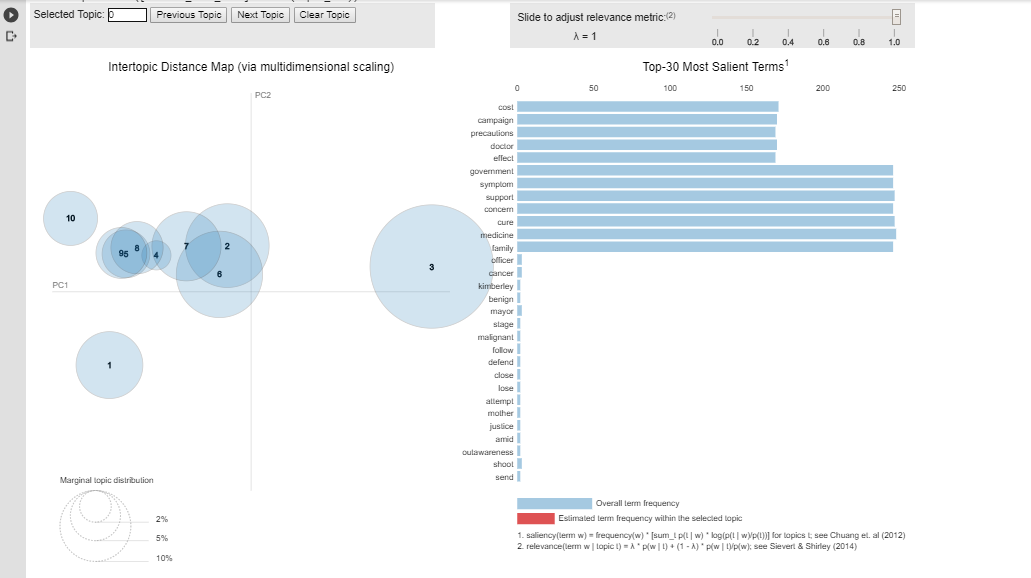

### Now we get different sub-Topic related to health like Government, Diseases, Awareness etc.. and then we again apply topic modeling for third level in which we again sub divide the sub-topics.